In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
valid_n = [4 << i for i in range(15)]
valid_k = [2 << i for i in range(7)]
FILE = 'gpu_results_4.csv'

In [2]:
def gen_make_commands():
    CPU = False
   
    i = 1

    for n in valid_n:
        for k in valid_k:
            if CPU:
                print(f"$(CC) $(CFLAGS) -DNSAMPLES={n}  -DKCLASSES={k} obj/* $^ -o bin/$@-{i} -lm")
            else:
                print(f"$(CC) $(CFLAGS) -DNSAMPLES={n}  -DKCLASSES={k} obj/* $^ -o bin/$@-{i}")
            i += 1

    with open('run_tests.sh', 'w') as output:
        output.write('echo "N,K,Time(usec),Accuracy" > test/results.csv\n')
        for j in range(1,i):
            output.write(f'./bin/int_test-{j} >> test/results.csv\n')
    
gen_make_commands()

$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=2 obj/* $^ -o bin/$@-1
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=4 obj/* $^ -o bin/$@-2
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=8 obj/* $^ -o bin/$@-3
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=16 obj/* $^ -o bin/$@-4
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=32 obj/* $^ -o bin/$@-5
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=64 obj/* $^ -o bin/$@-6
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=2 obj/* $^ -o bin/$@-7
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=4 obj/* $^ -o bin/$@-8
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=8 obj/* $^ -o bin/$@-9
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=16 obj/* $^ -o bin/$@-10
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=32 obj/* $^ -o bin/$@-11
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=64 obj/* $^ -o bin/$@-12
$(CC) $(CFLAGS) -DNSAMPLES=16  -DKCLASSES=2 obj/* $^ -o bin/$@-13
$(CC) $(CFLAGS) -DNSAMPLES=16  -DKCLASSES=4 obj/* $^ -o bin/$@-14
$(CC) $(CFLAGS) -DNSAMPLES=16  -DKCLASSES=8 obj/* $^ -o bin/$@-15
$(CC) $(CFLAGS) -DNSAMPLE

In [3]:
df = pd.read_csv(FILE)
df.groupby(by='N').describe()

K                                              Time(usec)  \
      count  mean        std  min  25%   50%   75%   max      count   
N                                                                     
4       6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
8       6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
16      6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
32      6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
64      6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
128     6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
256     6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
512     6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
1024    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
2048    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
4096    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
8192    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
16384   6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   

                      ...                      Accuracy                      \
                mean  ...        75%       max    count      mean       std   
N                     ...                                                     
4        9518.833333  ...   10228.00   16322.0      6.0  0.208333  0.245798   
8        9541.166667  ...   10254.25   16322.0      6.0  0.208333  0.204124   
16       9719.500000  ...   11066.00   16342.0      6.0  0.125000  0.172301   
32       9528.333333  ...   10256.25   16298.0      6.0  0.177083  0.209787   
64       9512.166667  ...   10213.50   16287.0      6.0  0.171875  0.258073   
128      9523.666667  ...   10256.25   16304.0      6.0  0.161458  0.199221   
256      9541.833333  ...   10259.50   16338.0      6.0  0.153646  0.168805   
512     32524.166667  ...   36309.25   65500.0      6.0  0.234050  0.378014   
1024    37086.500000  ...   39076.25   63191.0      6.0  0.098633  0.150892   
2048    43691.000000  ...   47819.25   71510.0      6.0  0.153483  0.194896   
4096    54429.500000  ...   70700.75   81227.0      6.0  0.251994  0.376178   
8192    66993.500000  ...   72919.75  131121.0      6.0  0.086121  0.089187   
16384  111511.500000  ...  120317.75  236686.0      6.0  0.161702  0.183779   

                                                         
            min       25%       50%       75%       max  
N                                                        
4      0.000000  0.000000  0.125000  0.437500  0.500000  
8      0.000000  0.031250  0.187500  0.343750  0.500000  
16     0.000000  0.000000  0.062500  0.171875  0.437500  
32     0.000000  0.031250  0.078125  0.312500  0.500000  
64     0.000000  0.011719  0.070312  0.187500  0.671875  
128    0.000000  0.029297  0.085938  0.218750  0.523438  
256    0.031250  0.042968  0.089844  0.180664  0.472656  
512    0.027344  0.041016  0.088867  0.154297  0.998047  
1024   0.000000  0.022217  0.031738  0.092530  0.396484  
2048   0.012207  0.016113  0.070556  0.216919  0.503906  
4096   0.013184  0.041748  0.113282  0.219056  1.000000  
8192   0.013794  0.023163  0.056335  0.112671  0.246704  
16384  0.026672  0.032318  0.084412  0.221924  0.492004  

[13 rows x 24 columns]

In [4]:
df = pd.read_csv(FILE)
df.groupby(by='K').describe()

N                                                               \
   count         mean          std  min   25%    50%     75%      max   
K                                                                       
2   13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
4   13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
8   13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
16  13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
32  13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
64  13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   

   Time(usec)                ...                    Accuracy            \
        count          mean  ...      75%       max    count      mean   
K                            ...                                         
2        13.0  45744.307692  ...  47412.0  236686.0     13.0  0.508709   
4        13.0  29155.538462  ...  35100.0  127962.0     13.0  0.273423   
8        13.0  21671.846154  ...  26573.0   75766.0     13.0  0.125718   
16       13.0  23310.692308  ...  33596.0   74516.0     13.0  0.061678   
32       13.0  27460.230769  ...  45672.0   56754.0     13.0  0.027949   
64       13.0  43328.923077  ...  71510.0   97385.0     13.0  0.014080   

                                                                
         std       min       25%       50%       75%       max  
K                                                               
2   0.291302  0.000000  0.472656  0.500000  0.523438  1.000000  
4   0.110153  0.113281  0.218750  0.249023  0.375000  0.500000  
8   0.060209  0.000000  0.113281  0.125000  0.133545  0.250000  
16  0.064432  0.000000  0.031250  0.046875  0.066406  0.250000  
32  0.032955  0.000000  0.000000  0.024658  0.031250  0.125000  
64  0.013219  0.000000  0.000000  0.014648  0.026672  0.035156  

[6 rows x 24 columns]

Text(0.5, 1.0, 'GPU(naive) -- Time (sec) vs. Number of Sample Points for fixed K')

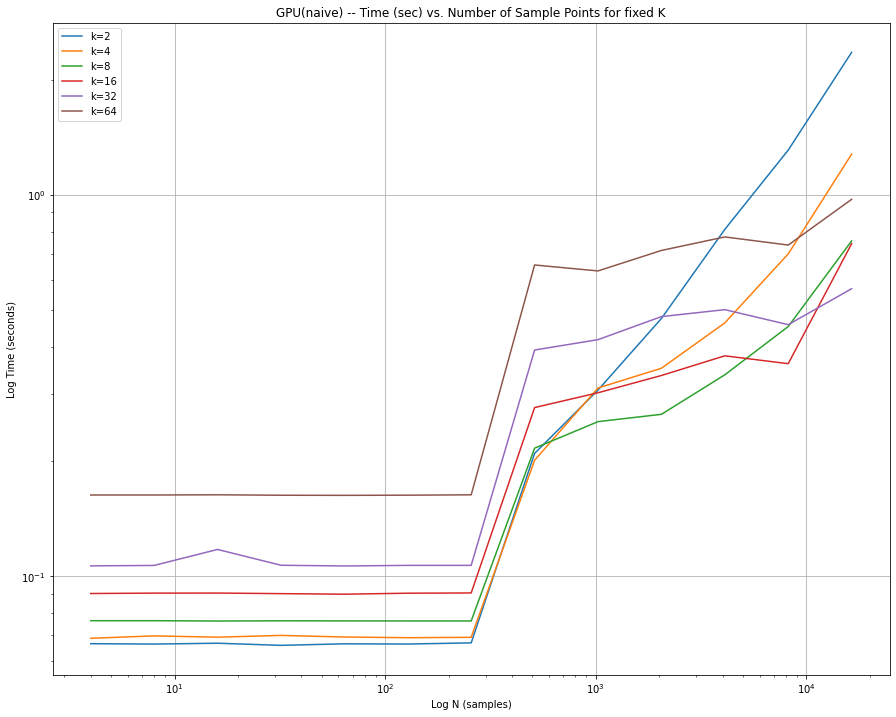

In [5]:
df = pd.read_csv(FILE)
ns = df.groupby(by='N')
ks = []
plt.figure(figsize=(15, 12))

for i in valid_k:
    ks.append(df[df.K == i])

for p in ks:
    plt.subplot()
    plt.plot(p['N'], p['Time(usec)']/100000)

plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.legend(['k=2', 'k=4', 'k=8', 'k=16', 'k=32', 'k=64'])
plt.xlabel('Log N (samples)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(naive) -- Time (sec) vs. Number of Sample Points for fixed K')

Text(0.5, 1.0, 'GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')

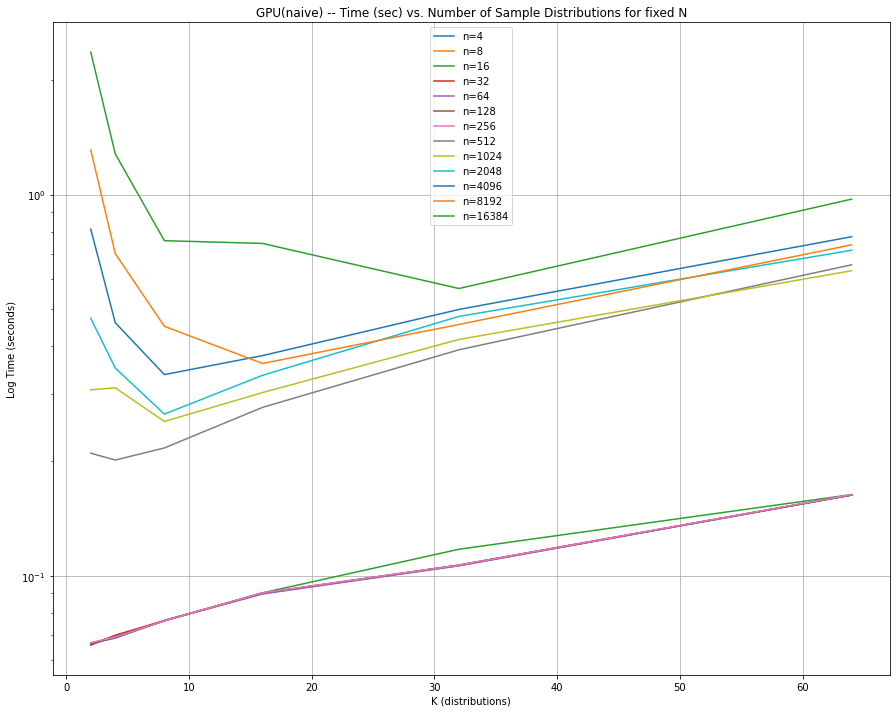

In [6]:
df = pd.read_csv(FILE)
ks = df.groupby(by='K')
ns = []
for i in valid_n:
    ns.append(df[df.N == i])

ns

plt.figure(figsize=(15, 12))
for p in ns:
    plt.subplot()
    plt.plot(p['K'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['n=4', 'n=8', 'n=16', 'n=32', 'n=64', 'n=128', 'n=256', 'n=512', 'n=1024', 'n=2048', 'n=4096', 'n=8192', 'n=16384'])
plt.xlabel('K (distributions)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')


Text(0.5, 1.0, 'GPU(naive) -- Accuracy (%) vs. Number of Sample Points for fixed K')

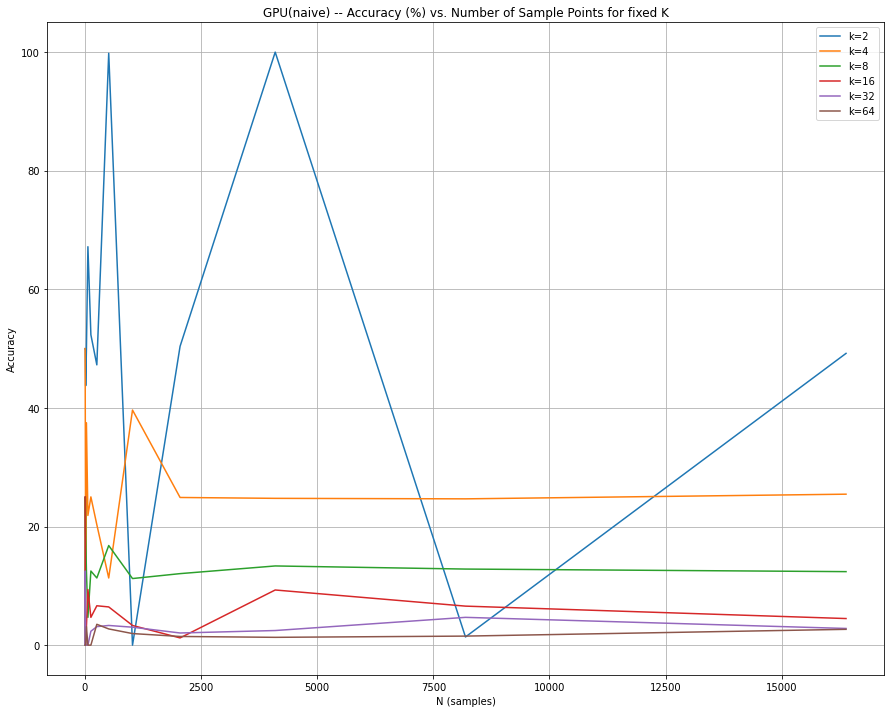

In [11]:
df = pd.read_csv(FILE)
ns = df.groupby(by='N')
ks = []
plt.figure(figsize=(15, 12))

for i in valid_k:
    ks.append(df[df.K == i])

for p in ks:
    plt.subplot()
    plt.plot(p['N'], p['Accuracy']*100)

plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('linear')
plt.xscale('linear')
plt.legend(['k=2', 'k=4', 'k=8', 'k=16', 'k=32', 'k=64'])
plt.xlabel('N (samples)')
plt.ylabel('Accuracy')
plt.title('GPU(naive) -- Accuracy (%) vs. Number of Sample Points for fixed K')

In [14]:
df.Accuracy.describe()

count    78.000000
mean      0.168593
std       0.217991
min       0.000000
25%       0.021240
50%       0.079712
75%       0.248657
max       1.000000
Name: Accuracy, dtype: float64

In [17]:
df[df.Accuracy > 0.2]

,N,K,Time(usec),Accuracy
0,4,2,6647,0.500000
1,4,4,6868,0.500000
3,4,16,9001,0.250000
6,8,2,6632,0.500000
7,8,4,6968,0.375000
8,8,8,7638,0.250000
12,16,2,6666,0.437500
18,32,2,6581,0.500000
19,32,4,6988,0.375000
24,64,2,6642,0.671875
